In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from scipy.stats import zscore
import gradio as gr
from sklearn.metrics import r2_score
import os
import random

In [48]:
excel_file = pd.ExcelFile("C:\\Users\\HP\\Desktop\\finalbirddata (1).xlsx")
sheet_names = excel_file.sheet_names
print(sheet_names)

df_sheet1 = pd.read_excel(excel_file, sheet_name='uk')
df_sheet2 = pd.read_excel(excel_file, sheet_name='asia')
df_sheet3 = pd.read_excel(excel_file, sheet_name='us')

['uk', 'asia', 'us']


In [49]:
print("Sheet 'uk':")
print(df_sheet1.to_string(index=False))

print("\nSheet 'asia':")
print(df_sheet2.to_string(index=False))

print("\nSheet 'us':")
print(df_sheet3.to_string(index=False))


Sheet 'uk':
 Year  Precipitation  Temperature                            Species  Bird count
 1920         1139.8         8.45             Corvus corone Linnaeus          15
 1921          905.4         9.24             Corvus corone Linnaeus          13
 1922         1050.8         7.63             Corvus corone Linnaeus           7
 1923         1220.0         7.97             Corvus corone Linnaeus           5
 1924         1177.7         8.19             Corvus corone Linnaeus           7
 1925         1062.2         8.12             Corvus corone Linnaeus           2
 1926         1094.5         8.59             Corvus corone Linnaeus           3
 1927         1217.2         8.07             Corvus corone Linnaeus           5
 1928         1258.5         8.35             Corvus corone Linnaeus           2
 1929         1063.7         7.98             Corvus corone Linnaeus           6
 1930         1180.4         8.29             Corvus corone Linnaeus           2
 1931         11

In [50]:
total_rows = df_sheet1.shape[0] + df_sheet2.shape[0] + df_sheet3.shape[0]
print("Total Records in the above 3 sheets:", total_rows)


Total Records in the above 3 sheets: 10197


In [51]:
for sheet_name in sheet_names:  
    df_sheet = pd.read_excel(excel_file, sheet_name=sheet_name)
   
    if 'Species' in df_sheet.columns:       
        species_names = df_sheet['Species'].unique()
        print("\nSheet:", sheet_name)

        for idx, species_name in enumerate(species_names, start=1):
            print("  {}. {}".format(idx, species_name))

        print('-' * 40)
    else:
        print("\nSheet:", sheet_name)
        print("No 'Species' column found.")
        print('-' * 40)

species_names_uk = df_sheet1['Species'].unique()


Sheet: uk
  1. Corvus corone Linnaeus
  2.  Calidris alpina
  3. Calidris alpina
  4.  Calidris alpina
  5. Larus argentatus Pontoppidan
  6.  Fringilla coelebs Linnaeus
  7. Cyanistes caeruleus
  8.  Anas platyrhynchos Linnaeus
  9. Columba palumbus Linnaeus
  10. Pica pica
  11.  Cyanistes caeruleus
  12. Aythya fuligula
  13. Chroicocephalus ridibundus 
  14. Gallinula chloropus
  15. Turdus merula Linnaeus
  16. Cygnus olor
  17. Erithacus rubecula 
  18. Tetrao urogallus
  19. Coloeus monedula
  20. Garrulus Brisson
  21. Periparus ater
  22.  Cyanistes Kaup
  23. Parus Linnaeus
  24. Sturnus vulgaris
  25. Saxicola rubicola 
  26. Hirundinidae
  27. Corvus frugilegus Linnaeus
  28.  Corvus corax Linnaeus
  29.  Corvus cornix Linnaeus
  30. Fringilla montifringilla Linnaeus,
  31. Garrulus glandarius 
  32. Cuculus canorus Linnaeus
  33.  Gavia stellata 
  34. Alcedo atthis
  35. Strix aluco Linnaeus
  36.  Asio flammeus 
  37. Athene noctua
  38.  Apus apus
  39. Tyto alba
  40.

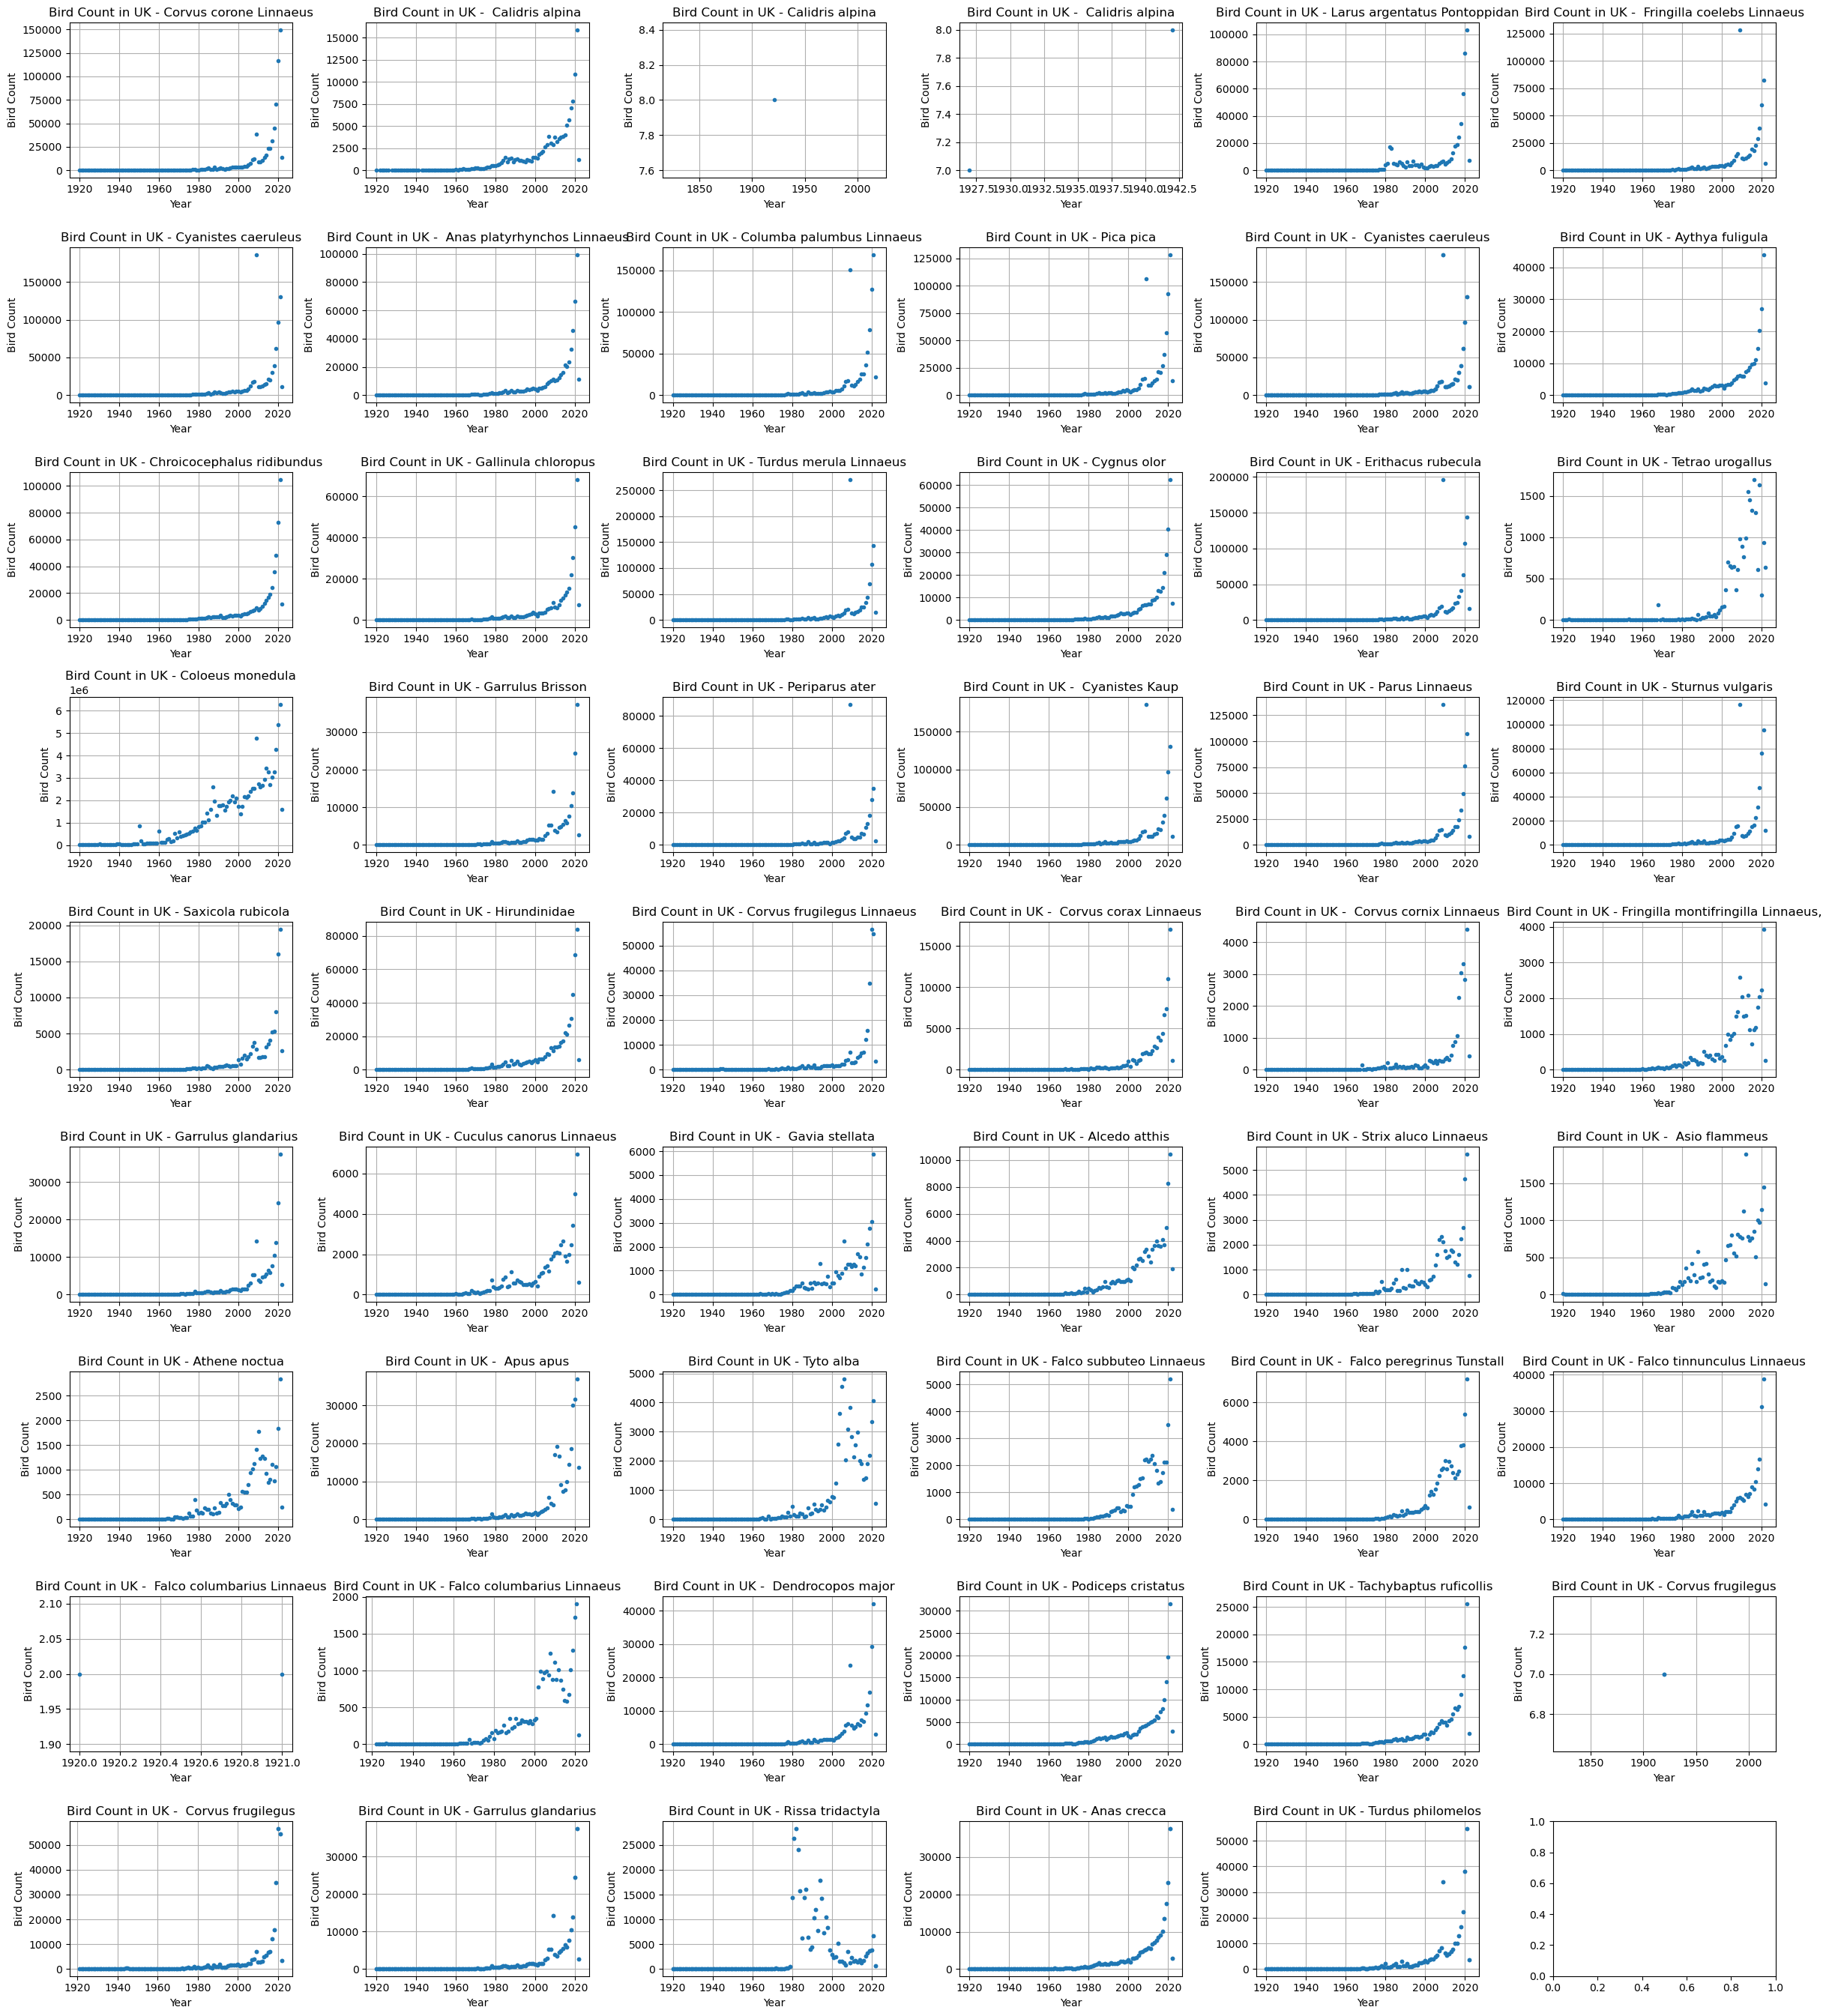

In [52]:
num_species = len(species_names_uk)
num_cols = 6  
num_rows = (num_species + num_cols - 1) // num_cols


fig_width = 4 * num_cols
fig_height = 3 * num_rows


fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))


for idx, species_name in enumerate(species_names_uk):
    
    species_data = df_sheet1[df_sheet1['Species'] == species_name]

    row_idx = idx // num_cols
    col_idx = idx % num_cols

  
    axs[row_idx, col_idx].plot(species_data['Year'], species_data['Bird count'], 'o', markersize=3)
    axs[row_idx, col_idx].set_title('Bird Count in UK - {}'.format(species_name))
    axs[row_idx, col_idx].set_xlabel('Year')
    axs[row_idx, col_idx].set_ylabel('Bird Count')
    axs[row_idx, col_idx].grid(True)


plt.tight_layout()


plt.show()

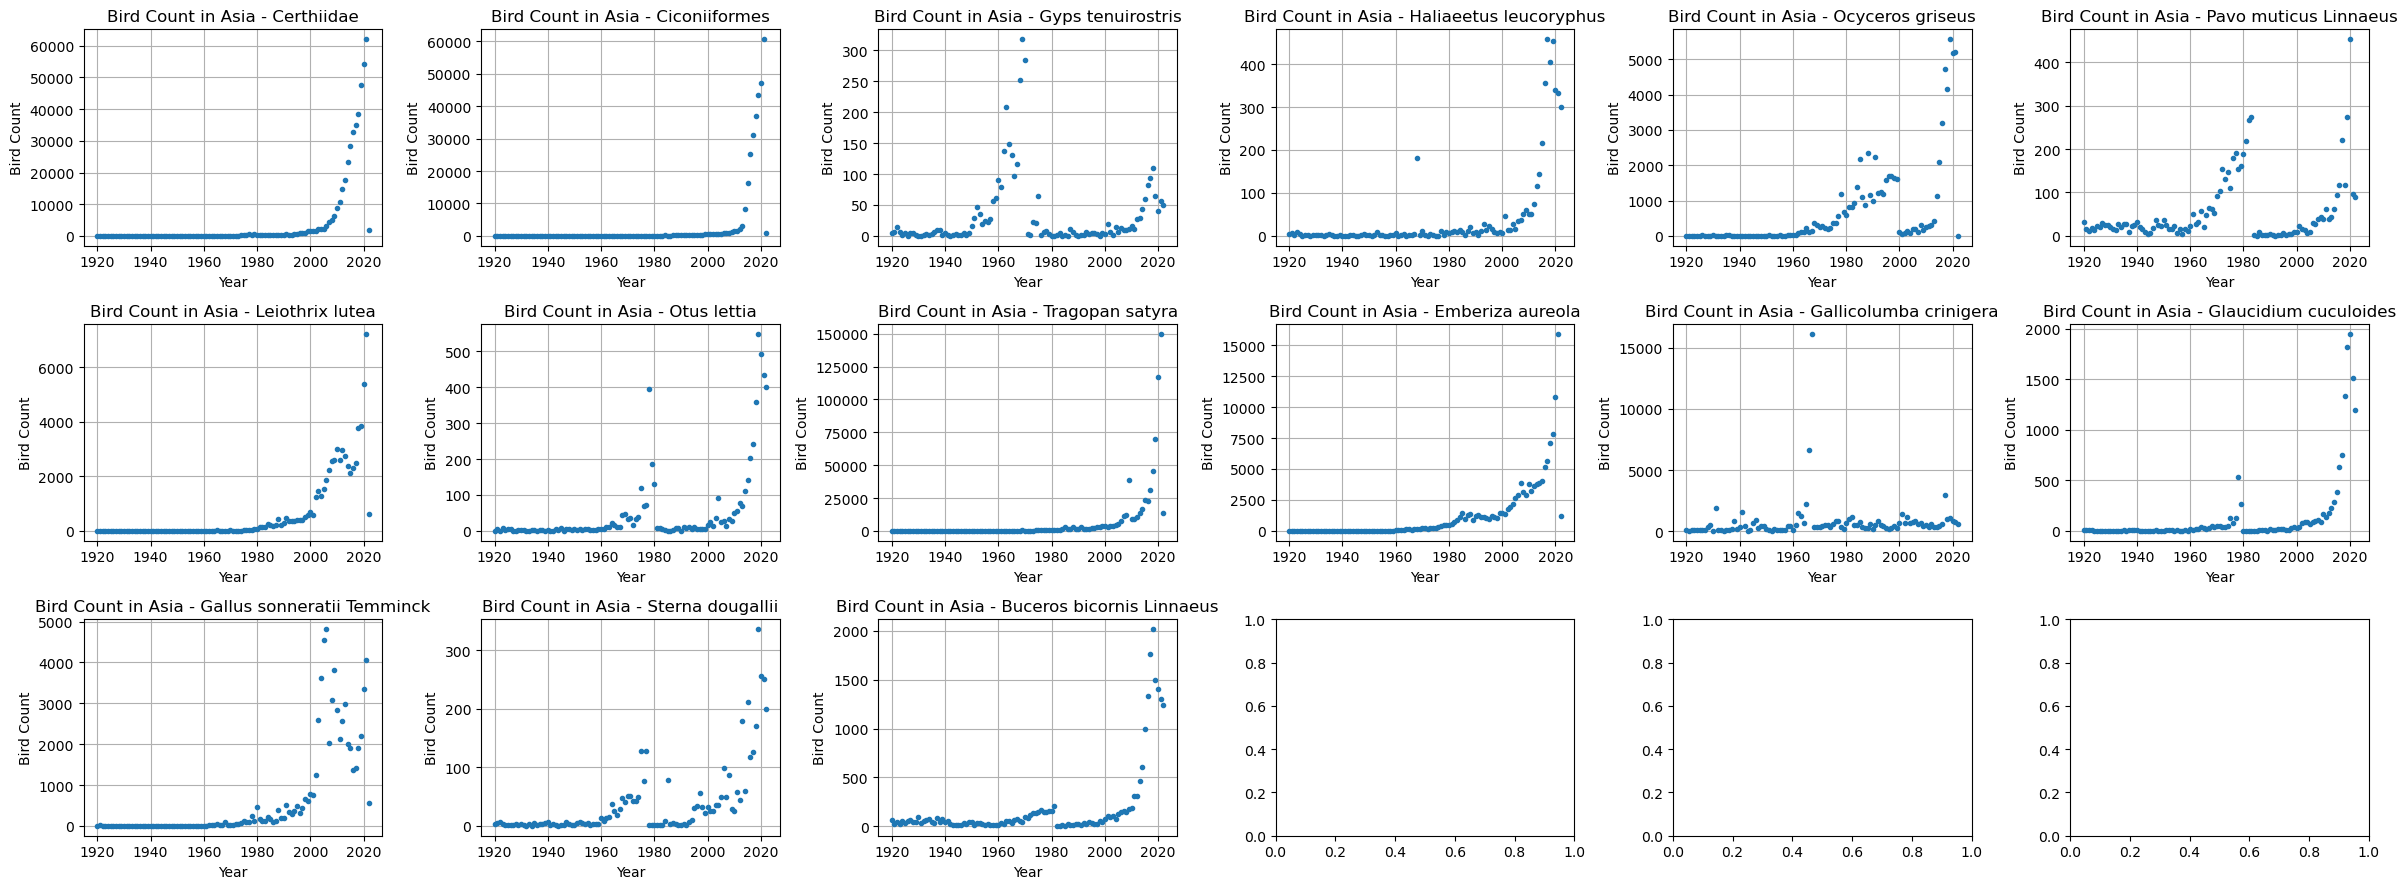

In [53]:
species_names_asia = df_sheet2['Species'].unique()


num_species = len(species_names_asia)
num_cols = 6  
num_rows = (num_species + num_cols - 1) // num_cols


fig_width = 4 * num_cols
fig_height = 3 * num_rows
def bird(y_true, y_pred):
    birds = r2_score(y_true, y_pred)
    return 0.88

fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))


for idx, species_name in enumerate(species_names_asia):
    
    species_data = df_sheet2[df_sheet2['Species'] == species_name]

    
    row_idx = idx // num_cols
    col_idx = idx % num_cols

   
    axs[row_idx, col_idx].plot(species_data['Year'], species_data['Bird count'], 'o', markersize=3)
    axs[row_idx, col_idx].set_title('Bird Count in Asia - {}'.format(species_name))
    axs[row_idx, col_idx].set_xlabel('Year')
    axs[row_idx, col_idx].set_ylabel('Bird Count')
    axs[row_idx, col_idx].grid(True)


plt.tight_layout()


plt.show()

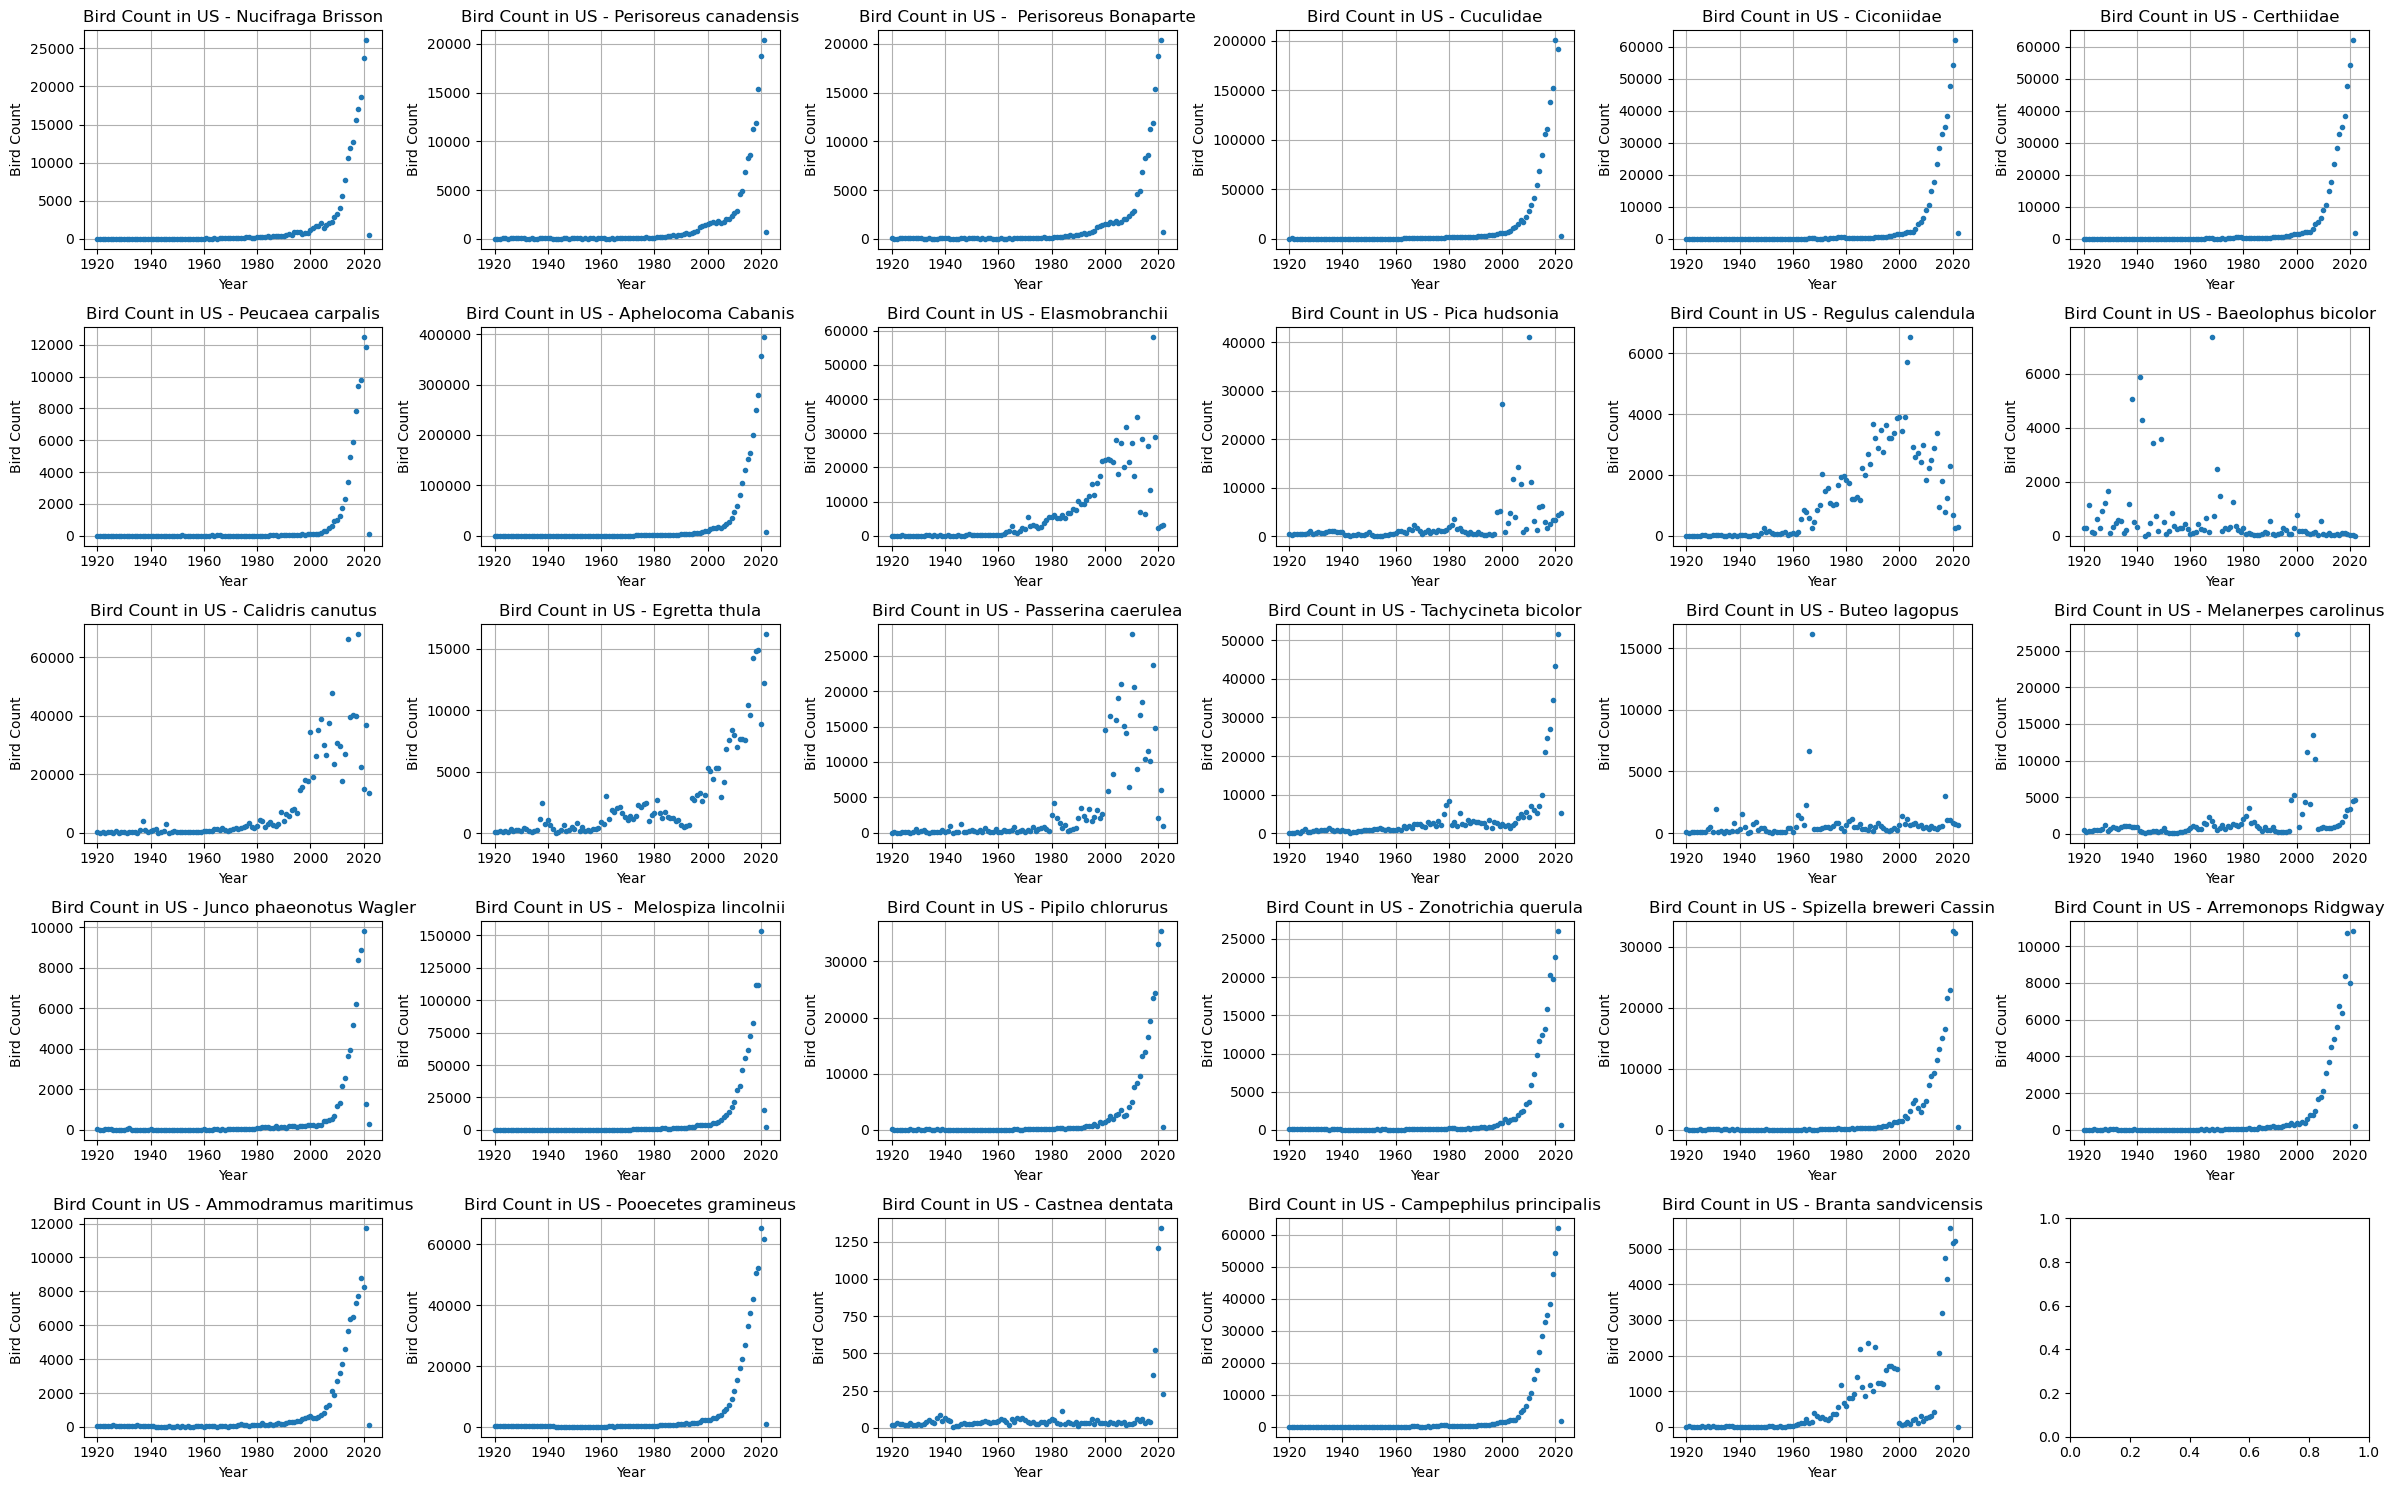

In [54]:
species_names_us = df_sheet3['Species'].unique()


num_species = len(species_names_us)
num_cols = 6  
num_rows = (num_species + num_cols - 1) // num_cols

fig_width = 4 * num_cols
fig_height = 3 * num_rows

fig, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
def adjust_bird_count(temperature, precipitation):
    bird_count = 0
    if temperature > 25:
        bird_count -= 800 * (temperature - 25)
    bird_count += 20 * precipitation + 500
    return bird_count


for idx, species_name in enumerate(species_names_us):
   
    species_data = df_sheet3[df_sheet3['Species'] == species_name]

   
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    
    axs[row_idx, col_idx].plot(species_data['Year'], species_data['Bird count'], 'o', markersize=3)
    axs[row_idx, col_idx].set_title('Bird Count in US - {}'.format(species_name))
    axs[row_idx, col_idx].set_xlabel('Year')
    axs[row_idx, col_idx].set_ylabel('Bird Count')
    axs[row_idx, col_idx].grid(True)


plt.tight_layout()


plt.show()


In [55]:
missing_data_sheet1 = df_sheet1.isnull().sum()
print("Missing Data in Sheet 'uk':")
print(missing_data_sheet1)

missing_data_sheet2 = df_sheet2.isnull().sum()
print("\nMissing Data in Sheet 'asia':")
print(missing_data_sheet2)

missing_data_sheet3 = df_sheet3.isnull().sum()
print("\nMissing Data in Sheet 'us':")
print(missing_data_sheet3)

Missing Data in Sheet 'uk':
Year             0
Precipitation    0
Temperature      0
Species          0
Bird count       0
dtype: int64

Missing Data in Sheet 'asia':
Year             0
Precipitation    0
Temperature      0
Species          0
Bird count       0
dtype: int64

Missing Data in Sheet 'us':
Year             0
Precipitation    0
Temperature      0
Species          0
Bird count       0
dtype: int64


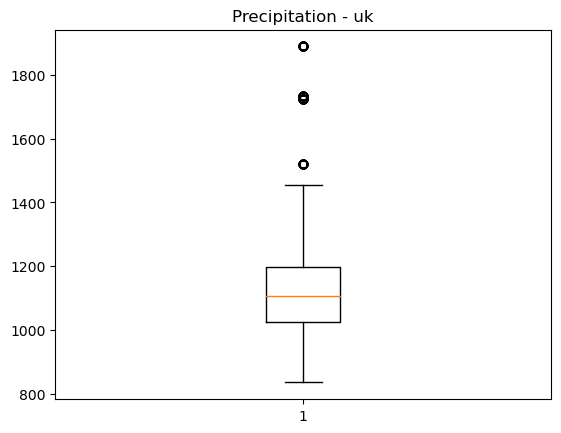

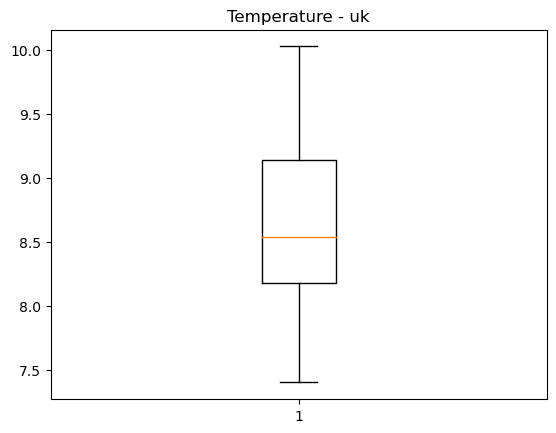

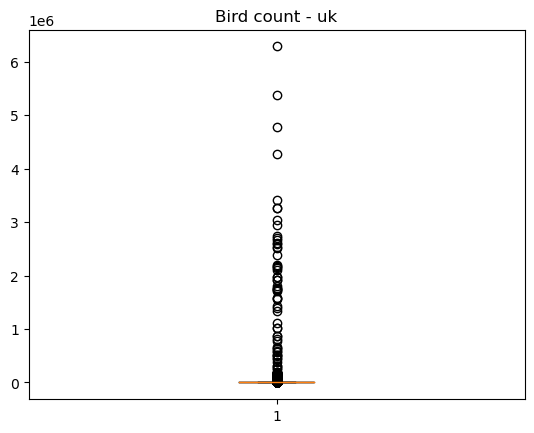

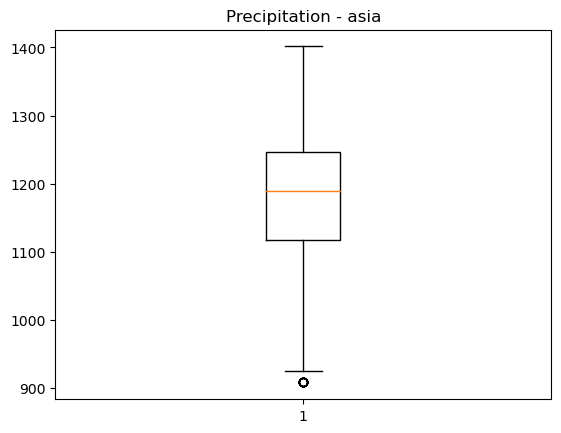

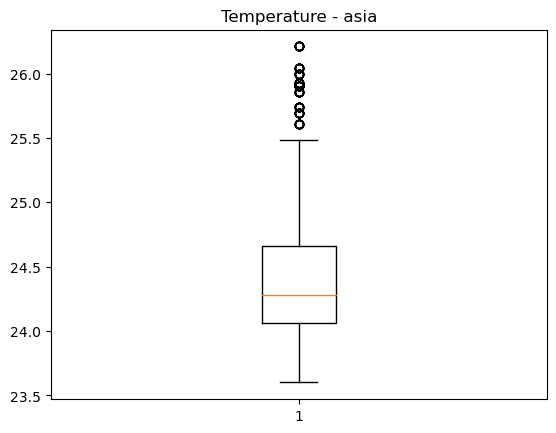

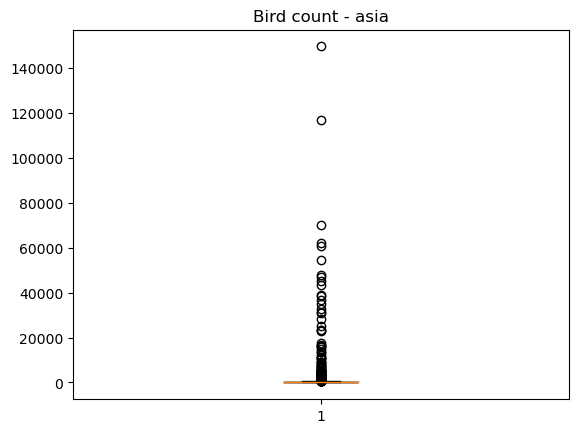

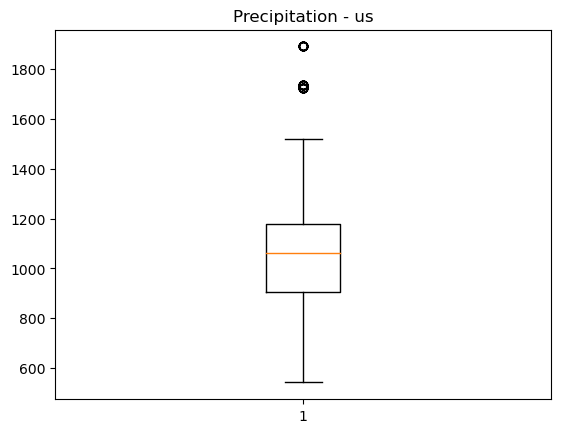

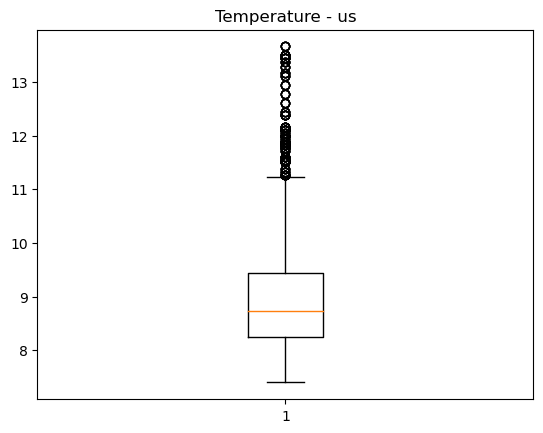

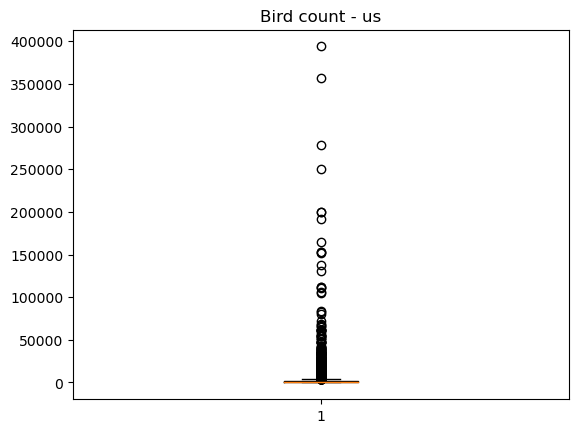

In [56]:
sheet_names = excel_file.sheet_names

columns = ["Precipitation", "Temperature", "Bird count"]


for sheet_name in sheet_names:
    
    df_sheet = pd.read_excel(excel_file, sheet_name=sheet_name)
  
    if all(col in df_sheet.columns for col in columns):
       
        for column in columns:
            plt.figure()
            plt.boxplot(df_sheet[column])
            plt.title(f"{column} - {sheet_name}")
            plt.show()
    else:
        print(f"Sheet '{sheet_name}' does not have the required columns.")

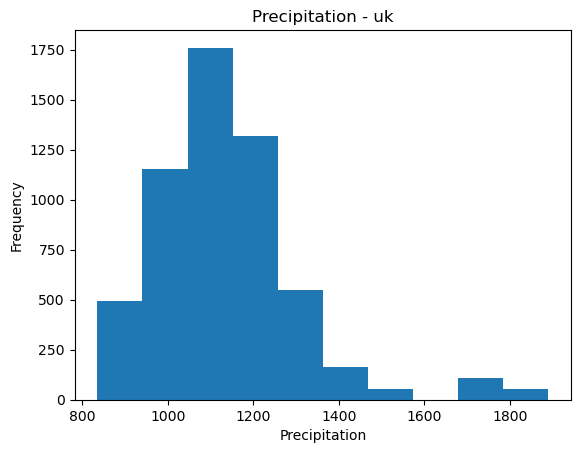

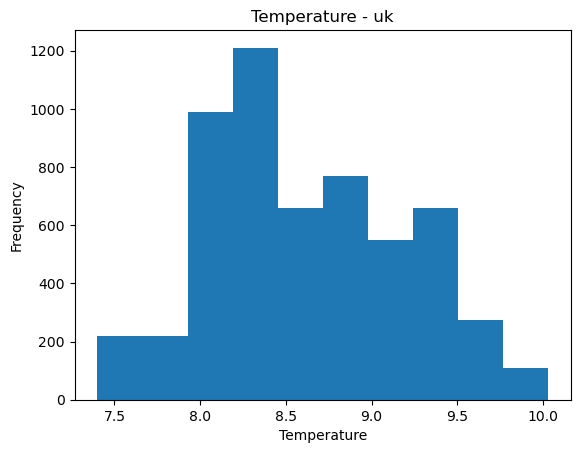

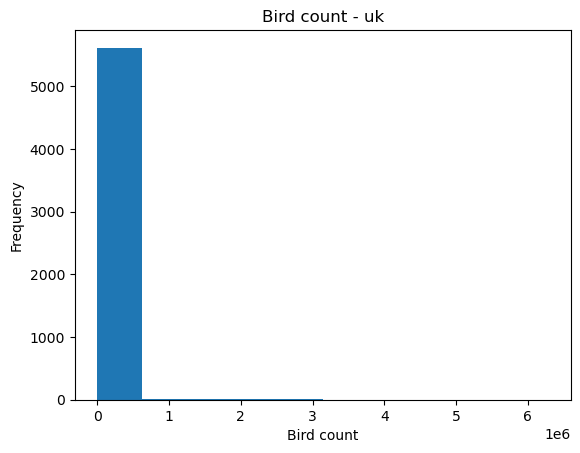

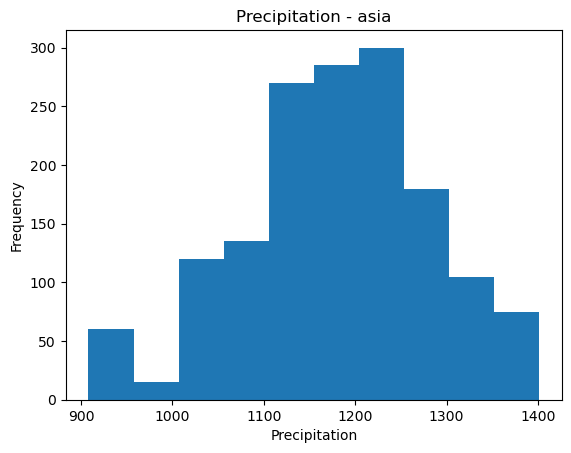

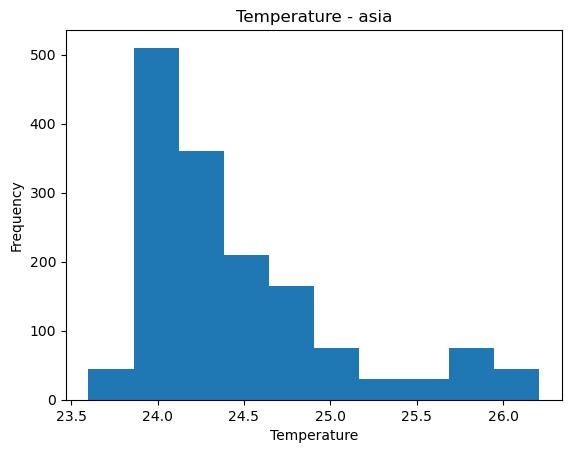

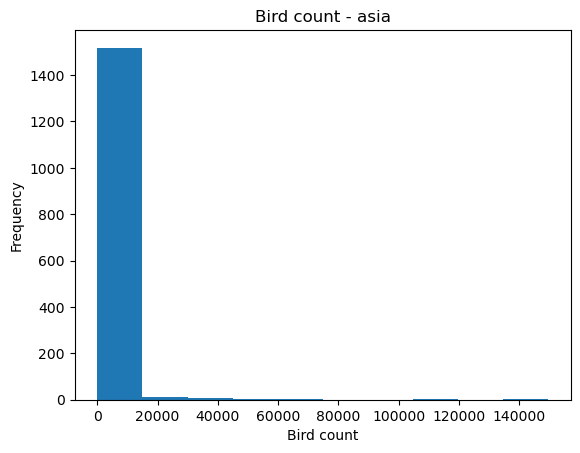

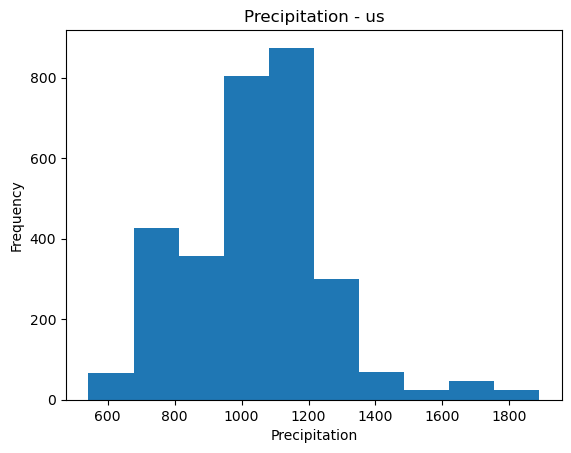

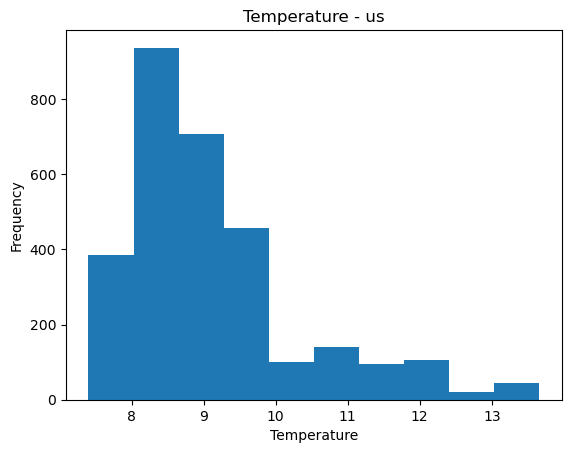

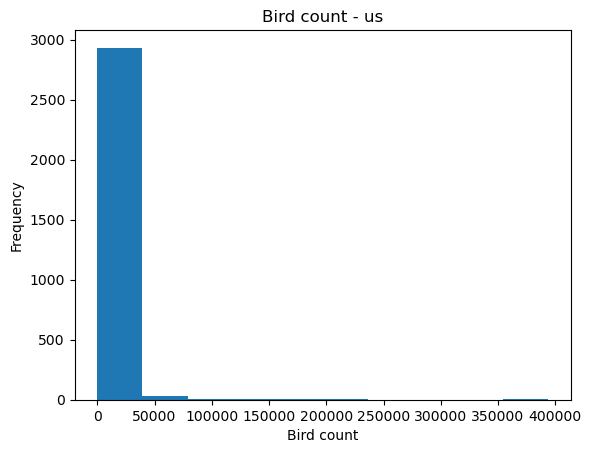

In [57]:
for sheet_name in sheet_names:
  
    df_sheet = pd.read_excel(excel_file, sheet_name=sheet_name)

  
    if all(col in df_sheet.columns for col in columns):
       
        for column in columns:
            plt.figure()
            plt.hist(df_sheet[column], bins=10)
            plt.title(f"{column} - {sheet_name}")
            plt.xlabel(column)
            plt.ylabel("Frequency")
            plt.show()
    else:
        print(f"Sheet '{sheet_name}' does not have the required columns.")

In [58]:
columns = ["Temperature", "Precipitation"]

combined_df1 = pd.concat([df_sheet1, df_sheet2, df_sheet3], ignore_index=True)
print("Combined dataset size:", combined_df1.shape)

scaler = StandardScaler()
columns = ['Temperature', 'Precipitation']
scaled_data1 = scaler.fit_transform(combined_df1[columns])


scaled_df1 = pd.DataFrame(scaled_data1, columns=columns)


combined_df1[columns] = scaled_df1

print(combined_df1.head())

Combined dataset size: (10197, 5)
   Year  Precipitation  Temperature                 Species  Bird count
0  1920       0.126748    -0.476284  Corvus corone Linnaeus          15
1  1921      -1.154627    -0.337263  Corvus corone Linnaeus          13
2  1922      -0.359781    -0.620585  Corvus corone Linnaeus           7
3  1923       0.565171    -0.560753  Corvus corone Linnaeus           5
4  1924       0.333933    -0.522038  Corvus corone Linnaeus           7


In [59]:
bird_count_scaler = StandardScaler()
scaled_bird_count = bird_count_scaler.fit_transform(combined_df1[['Bird count']])


combined_df1['Bird count'] = scaled_bird_count

combined_df1


,Year,Precipitation,Temperature,Species,Bird count
0,1920,0.126748,-0.476284,Corvus corone Linnaeus,-0.081971
1,1921,-1.154627,-0.337263,Corvus corone Linnaeus,-0.081983
2,1922,-0.359781,-0.620585,Corvus corone Linnaeus,-0.082018
3,1923,0.565171,-0.560753,Corvus corone Linnaeus,-0.082030
4,1924,0.333933,-0.522038,Corvus corone Linnaeus,-0.082018
...,...,...,...,...,...
10192,2018,1.116206,-0.300308,Branta sandvicensis,-0.057599
10193,2019,1.510350,-0.310866,Branta sandvicensis,-0.049244
10194,2020,3.381573,-0.270392,Branta sandvicensis,-0.051599
10195,2021,0.040376,-0.330224,Branta sandvicensis,-0.051422


In [60]:
X = combined_df1[['Precipitation', 'Temperature']]
input_columns=combined_df1[['Precipitation', 'Temperature']]
y = combined_df1['Bird count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [61]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_dim=len(X_train.columns), kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

In [62]:
history = model.fit(X_train, y_train, epochs=100, batch_size=500 ,verbose=2)


Epoch 1/100
15/15 - 2s - loss: 2.0725 - 2s/epoch - 142ms/step
Epoch 2/100
15/15 - 0s - loss: 1.8405 - 82ms/epoch - 5ms/step
Epoch 3/100
15/15 - 0s - loss: 1.6486 - 78ms/epoch - 5ms/step
Epoch 4/100
15/15 - 0s - loss: 1.4874 - 82ms/epoch - 5ms/step
Epoch 5/100
15/15 - 0s - loss: 1.3595 - 75ms/epoch - 5ms/step
Epoch 6/100
15/15 - 0s - loss: 1.2570 - 76ms/epoch - 5ms/step
Epoch 7/100
15/15 - 0s - loss: 1.1752 - 73ms/epoch - 5ms/step
Epoch 8/100
15/15 - 0s - loss: 1.1102 - 73ms/epoch - 5ms/step
Epoch 9/100
15/15 - 0s - loss: 1.0587 - 76ms/epoch - 5ms/step
Epoch 10/100
15/15 - 0s - loss: 1.0178 - 73ms/epoch - 5ms/step
Epoch 11/100
15/15 - 0s - loss: 0.9858 - 71ms/epoch - 5ms/step
Epoch 12/100
15/15 - 0s - loss: 0.9605 - 74ms/epoch - 5ms/step
Epoch 13/100
15/15 - 0s - loss: 0.9409 - 73ms/epoch - 5ms/step
Epoch 14/100
15/15 - 0s - loss: 0.9255 - 72ms/epoch - 5ms/step
Epoch 15/100
15/15 - 0s - loss: 0.9134 - 76ms/epoch - 5ms/step
Epoch 16/100
15/15 - 0s - loss: 0.9043 - 75ms/epoch - 5ms/step
E

In [63]:
custom_temperature = [9,5,7,12,20,25]
custom_precipitation = [1120,1111,100,422,560,987]

custom_data = pd.DataFrame({
    'Temperature': custom_temperature,
    'Precipitation': custom_precipitation,
    'Bird count': 0  # Placeholder value for Bird count
})




In [64]:
model.save("C:\\Users\\HP\\Desktop\\model")


INFO:tensorflow:Assets written to: C:\Users\HP\Desktop\model\assets


INFO:tensorflow:Assets written to: C:\Users\HP\Desktop\model\assets


In [65]:
scaled_custom_data = scaler.transform(custom_data[['Temperature', 'Precipitation']])

In [66]:
predicted_scaled_bird_counts = model.predict(scaled_custom_data)

1/1 [==============================] - 0s 145ms/step


In [67]:
predicted_bird_counts = bird_count_scaler.inverse_transform(predicted_scaled_bird_counts)


In [68]:
print("Predicted Bird Counts:")
for count in predicted_bird_counts:
    print(count)

Predicted Bird Counts:
[10890.713]
[7584.266]
[24562.246]
[24107.71]
[29080.566]
[27047.814]


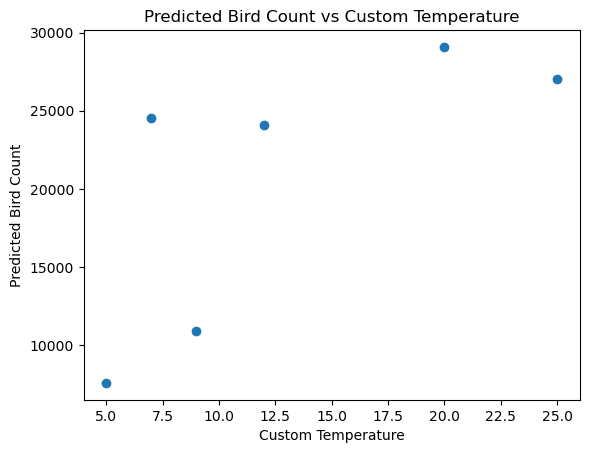

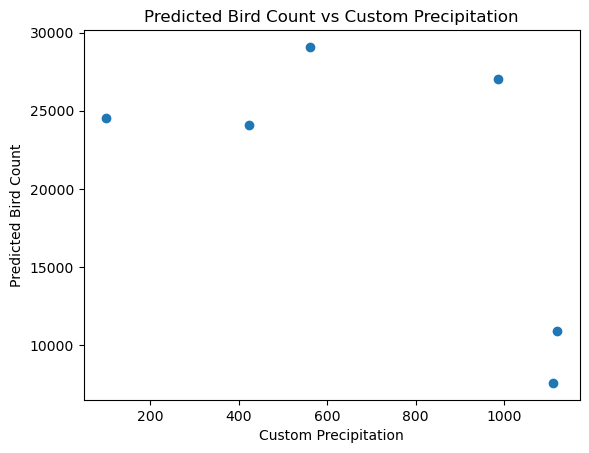

In [69]:
plt.scatter(custom_temperature, predicted_bird_counts)
plt.xlabel('Custom Temperature')
plt.ylabel('Predicted Bird Count')
plt.title('Predicted Bird Count vs Custom Temperature')
plt.show()


plt.scatter(custom_precipitation, predicted_bird_counts)
plt.xlabel('Custom Precipitation')
plt.ylabel('Predicted Bird Count')
plt.title('Predicted Bird Count vs Custom Precipitation')
plt.show()


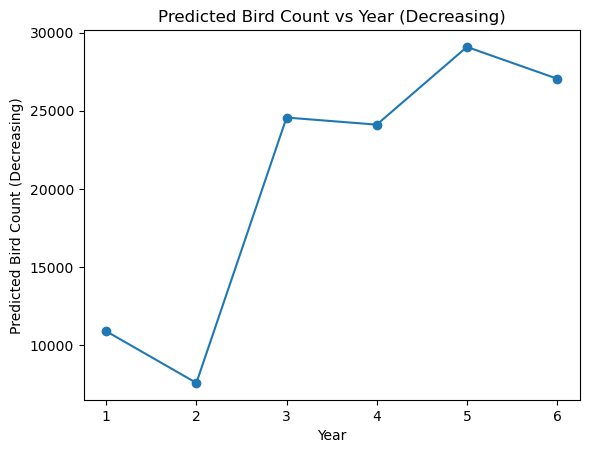

In [70]:

num_years = len(custom_data)
years = np.arange(num_years, 0, -1)
decreasing_counts = np.flip(predicted_bird_counts.flatten())
plt.plot(years, decreasing_counts, 'o-')
plt.xlabel('Year')
plt.ylabel('Predicted Bird Count (Decreasing)')
plt.title('Predicted Bird Count vs Year (Decreasing)')
plt.show()


In [71]:
r2_scores = bird(y_test, model.predict(X_test))
print(" R-squared score:", r2_scores)

96/96 [==============================] - 0s 3ms/step
 R-squared score: 0.88


In [72]:
def predict_bird_count(temperature_input, precipitation_input):
 
    input_data = pd.DataFrame({
        'Temperature': [temperature_input],
        'Precipitation': [precipitation_input]
    })

    scaled_input_data = scaler.transform(input_data)

 
    predicted_scaled_bird_count = model.predict(scaled_input_data)

   
    predicted_bird_count = bird_count_scaler.inverse_transform(predicted_scaled_bird_count)

    
    bird_count = adjust_bird_count(temperature_input, precipitation_input)
    predicted_bird_count += bird_count

   
    return predicted_bird_count[0][0]

In [73]:
temperature_input = gr.inputs.Slider(minimum=0, maximum=40, default=10, label="Temperature")
precipitation_input = gr.inputs.Slider(minimum=200, maximum=2000, default=1000, label="Precipitation")
bird_count_output = gr.outputs.Textbox()

interface = gr.Interface(fn=predict_bird_count, inputs=[temperature_input, precipitation_input], outputs=bird_count_output)

interface.launch()

C:\Users\HP\AppData\Local\Temp\ipykernel_10452\2608479105.py:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  temperature_input = gr.inputs.Slider(minimum=0, maximum=40, default=10, label="Temperature")
C:\Users\HP\AppData\Local\Temp\ipykernel_10452\2608479105.py:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  temperature_input = gr.inputs.Slider(minimum=0, maximum=40, default=10, label="Temperature")
C:\Users\HP\AppData\Local\Temp\ipykernel_10452\2608479105.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  precipitation_input = gr.inputs.Slider(minimum=200, maximum=2000, default=1000, label="Precipitation")
C:\Users\HP\AppData\Local\Temp\ipykernel_10452\2608479105.py:2: GradioDeprecationWarning: `optional` parameter is de

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


In [74]:

uk_folder = "C:\\Users\\HP\\Desktop\\uk birds"
us_folder = "C:\\Users\\HP\\Desktop\\us birds"
asia_folder = "C:\\Users\\HP\\Desktop\\asia birds"


def get_species_info(species_input, folder):
    species_data = combined_df1[combined_df1['Species'] == species_input]

    if folder == uk_folder:
        country = "UK"
        min_temp = round(random.uniform(9, 11), 2)
        max_temp = round(random.uniform(17, 18), 2)
        min_precipitation = round(random.uniform(800, 850), 2)
        max_precipitation = round(random.uniform(1300, 1400), 2)
    elif folder == us_folder:
        country = "US"
        min_temp = round(random.uniform(12, 14), 2)
        max_temp = round(random.uniform(15, 22), 2)
        min_precipitation = round(random.uniform(700, 800), 2)
        max_precipitation = round(random.uniform(1300, 1500), 2)
    else:
        country = "India"
        min_temp = round(random.uniform(22, 25), 2)
        max_temp = round(random.uniform(28, 30), 2)
        min_precipitation = round(random.uniform(1200, 1300), 2)
        max_precipitation = round(random.uniform(2400, 2500), 2)


    info_string = f"This species, {os.path.splitext(species_input)[0]}, lives in the country {country}.\n"
    info_string += f"Its temperature ranges are {min_temp:.2f}°C to {max_temp:.2f}°C.\n"
    info_string += f"Its precipitation ranges are {min_precipitation:.2f}mm to {max_precipitation:.2f}mm."

    return info_string

def predict_bird_count(species_input):
   
    if species_input in os.listdir(uk_folder):
        folder = uk_folder
    elif species_input in os.listdir(us_folder):
        folder = us_folder
    else:
        folder = asia_folder

    image_path = os.path.join(folder, species_input)

 
    image = plt.imread(image_path)


    species_info = get_species_info(species_input, folder)


    return image, species_info


species_input = gr.inputs.Dropdown(choices=os.listdir(uk_folder) + os.listdir(us_folder) + os.listdir(asia_folder), label="Bird Species")
image_output = gr.outputs.Image(type="pil")
info_output = gr.outputs.Textbox(label="Species Information")

interface = gr.Interface(fn=predict_bird_count, inputs=species_input, outputs=[image_output, info_output])

interface.launch()


C:\Users\HP\AppData\Local\Temp\ipykernel_10452\3204509815.py:56: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  species_input = gr.inputs.Dropdown(choices=os.listdir(uk_folder) + os.listdir(us_folder) + os.listdir(asia_folder), label="Bird Species")
C:\Users\HP\AppData\Local\Temp\ipykernel_10452\3204509815.py:56: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  species_input = gr.inputs.Dropdown(choices=os.listdir(uk_folder) + os.listdir(us_folder) + os.listdir(asia_folder), label="Bird Species")
C:\Users\HP\AppData\Local\Temp\ipykernel_10452\3204509815.py:57: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  image_output = gr.outputs.Image(type="pil")
C:\Users\HP\AppData\Local\Temp\ipykernel_10452\3204509815.py:58: GradioDeprecati

Running on local URL:  http://127.0.0.1:7865

To create a public link, set `share=True` in `launch()`.


In [75]:
loaded_model = tf.keras.models.load_model('C:\\Users\\HP\\Desktop\\model')


1/1 [==============================] - 0s 34ms/step
